In [37]:
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.misc

In [2]:
data_transform = transforms.Compose([
        transforms.Resize((300,300)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

train_dataset = datasets.ImageFolder(root='../novel-data/train',
                                           transform=data_transform)
train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=10, shuffle=True,
                                             num_workers=4)
test_dataset = datasets.ImageFolder(root='../novel-data/test',
                                           transform=data_transform)
test_dataset_loader = torch.utils.data.DataLoader(test_dataset,
                                             batch_size=140, shuffle=True,
                                             num_workers=4)
test_x, test_y = next(iter(test_dataset_loader))
test_x, test_y = Variable(test_x), Variable(test_y)

### Jittering

In [26]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img, ang_range, shear_range, trans_range, brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    #if brightness == 1:
    #  img = augment_brightness_camera_images(img)

    return img

In [38]:
pic = mpimg.imread('../novel-data/train/' + 'person13' + '/face-' + str(1) + '.png')
scipy.misc.imsave('../novel-data/train/' + 'person13/face-6.png', pic)
#cv2.imwrite('../novel-data/train/' + 'person13/face-6.png', pic)

C:\Users\Ananya\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


C:\Users\Ananya\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


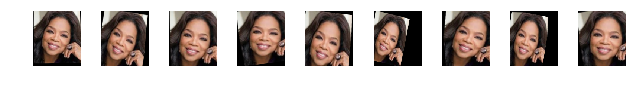

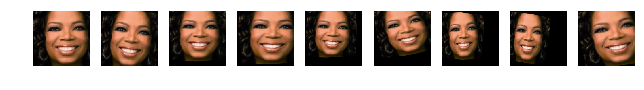

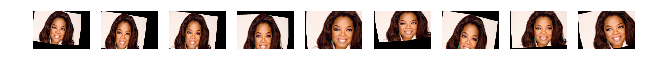

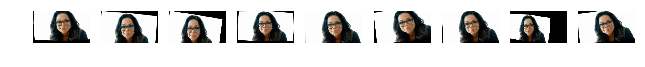

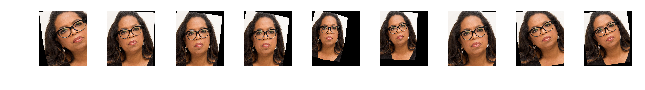

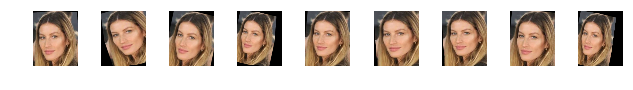

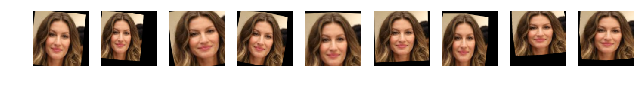

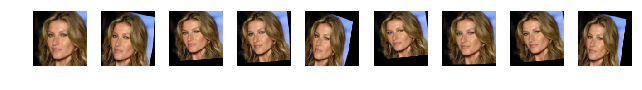

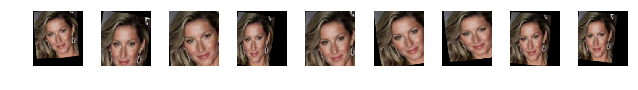

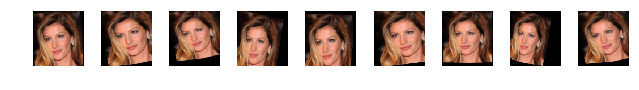

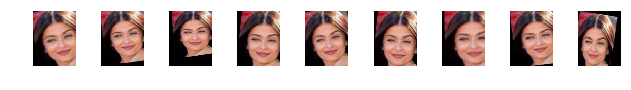

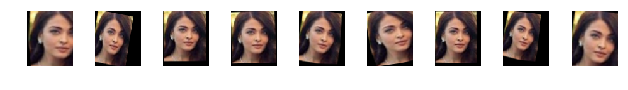

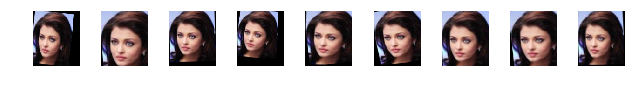

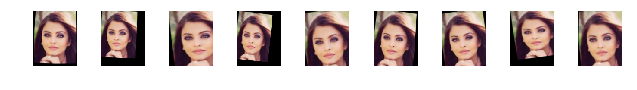

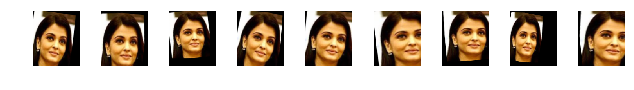

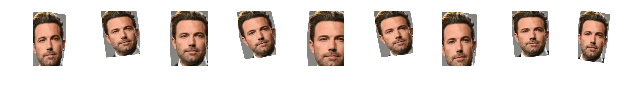

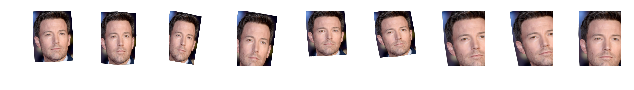

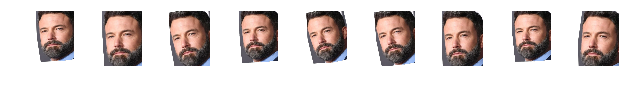

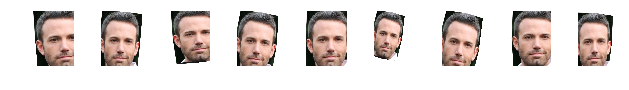

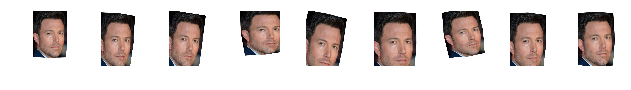

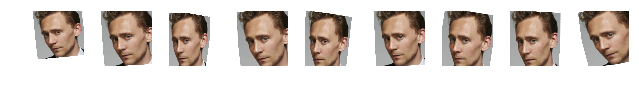

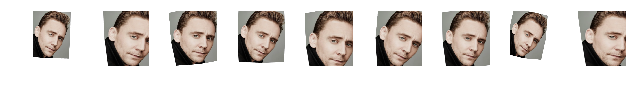

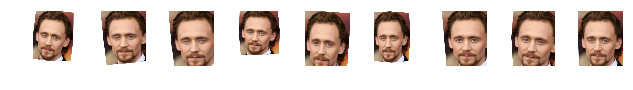

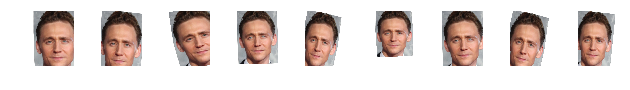

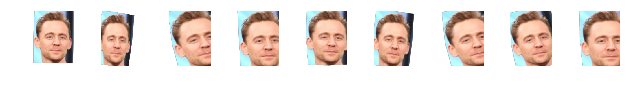

In [43]:
for f in range(10,15):
    num = 6
    folder = 'person' + str(f)
    for k in range(1,6):
        try:
            pic = mpimg.imread('../novel-data/train/' + folder + '/face-' + str(k) + '.png')
        except:
            pic = mpimg.imread('../novel-data/train/' + folder + '/face-' + str(k) + '.jpg')
        gs1 = gridspec.GridSpec(10, 10)
        gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
        plt.figure(figsize=(12,12))
        for i in range(9):
            ax1 = plt.subplot(gs1[i])
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            ax1.set_aspect('equal')
            img = transform_image(pic,20,5,5,brightness=1)
            scipy.misc.imsave('../novel-data/train/' + folder + '/face-' + str(num) + '.png', pic)
            plt.subplot(10,10,i+1)
            plt.imshow(img)
            plt.axis('off')
            num += 1

        plt.show()